# Mutual information  :

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer ()
df = pd.DataFrame(bc.data, columns = bc.feature_names)

X = df 
y = bc.target

In [3]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size = 0.3, random_state= 42)

X_train.shape,y_train.shape

((398, 30), (398,))

In [4]:
from sklearn.feature_selection import mutual_info_classif 
mutual_info = mutual_info_classif(X_train,y_train)
mi = pd.Series(mutual_info , index=X_train.columns)
mi = mi.sort_values(ascending = False)

<Axes: >

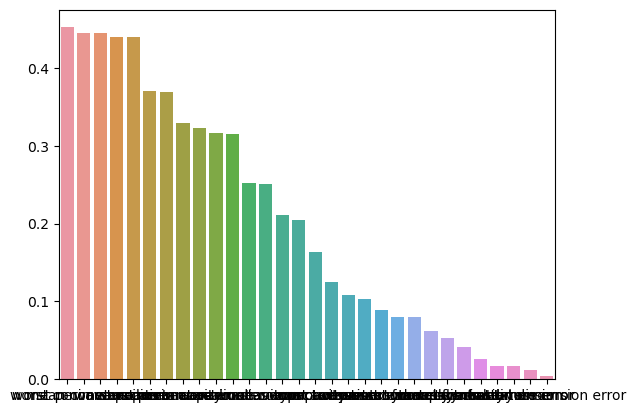

In [5]:
import seaborn as sns 
sns.barplot(x =mi.index , y = mi)


In [6]:
from sklearn.feature_selection import SelectKBest 
best_ten = SelectKBest(mutual_info_classif , k=10)
best_ten.fit(X_train,y_train)
best_ten

SelectKBest(score_func=<function mutual_info_classif at 0x7ff0fb03c8b0>)

In [7]:
best_ten.get_feature_names_out()

array(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius',
       'worst perimeter', 'worst area', 'worst concave points'],
      dtype=object)

In [8]:
X_train = X_train[best_ten.get_feature_names_out()]
X_test = X_test[best_ten.get_feature_names_out()]

In [9]:
X_train

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,area error,worst radius,worst perimeter,worst area,worst concave points
149,13.740,88.12,585.0,0.02881,0.01329,21.47,15.340,97.19,725.9,0.06019
124,13.370,86.10,553.5,0.08092,0.02800,14.66,14.260,91.99,632.1,0.08978
421,14.690,98.22,656.1,0.14500,0.06300,49.45,16.460,114.10,809.2,0.11080
195,12.910,82.53,516.4,0.03873,0.02377,15.75,13.880,90.81,600.6,0.08235
545,13.620,87.19,573.2,0.02974,0.02443,31.24,15.350,97.58,729.8,0.07174
...,...,...,...,...,...,...,...,...,...,...
71,8.888,58.79,244.0,0.08606,0.02872,25.44,9.733,62.56,284.4,0.04786
106,11.640,75.17,412.5,0.07070,0.03485,20.62,13.140,85.51,521.7,0.12180
270,14.290,90.30,632.6,0.00725,0.00625,10.77,14.910,94.44,684.6,0.03333
435,13.980,91.12,599.5,0.11260,0.06463,18.85,17.040,113.90,869.3,0.18270
